In [75]:
%load_ext pycodestyle_magic

# Arxiv Scraper Library

[Arxiv Scraper](https://github.com/mahdisadjadi/arxivscraper)

In [174]:
# %%pycodestyle

import os
import pandas as pd
import numpy as np
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

# Reference : https://arxiv.org/archive/cs

cs_arxiv_cat = {}

cs_arxiv_cat['cs.ai'] = 'Artificial Intelligence'
cs_arxiv_cat['cs.cl'] = 'Computation and Language'
cs_arxiv_cat['cs.cc'] = 'Computational Complexity'
cs_arxiv_cat['cs.ce'] = 'Computational Engineering, Finance, and Science'
cs_arxiv_cat['cs.cg'] = 'Computational Geometry'
cs_arxiv_cat['cs.gt'] = 'Computer Science and Game Theory'
cs_arxiv_cat['cs.cv'] = 'Computer Vision and Pattern Recognition'
cs_arxiv_cat['cs.cy'] = 'Computers and Society'
cs_arxiv_cat['cs.cr'] = 'Cryptography and Security'
cs_arxiv_cat['cs.ds'] = 'Data Structures and Algorithms'
cs_arxiv_cat['cs.db'] = 'Databases'
cs_arxiv_cat['cs.dl'] = 'Digital Libraries'
cs_arxiv_cat['cs.dm'] = 'Discrete Mathematics'
cs_arxiv_cat['cs.dc'] = 'Distributed, Parallel, and Cluster Computing'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.fl'] = 'Formal Languages and Automata Theory'
cs_arxiv_cat['cs.et'] = 'Emerging Technologies'
cs_arxiv_cat['cs.gl'] = 'General Literature'
cs_arxiv_cat['cs.gr'] = 'Graphics'
cs_arxiv_cat['cs.ar'] = 'Hardware Architecture'
cs_arxiv_cat['cs.hc'] = 'Human-Computer Interaction'
cs_arxiv_cat['cs.ir'] = 'Information Retrieval'
cs_arxiv_cat['cs.it'] = 'Information Theory'
cs_arxiv_cat['cs.lo'] = 'Logic in Computer Science'
cs_arxiv_cat['cs.lg'] = 'Machine Learning'
cs_arxiv_cat['cs.ms'] = 'Mathematical Software'
cs_arxiv_cat['cs.ma'] = 'Multiagent Systems'
cs_arxiv_cat['cs.mm'] = 'Multimedia'
cs_arxiv_cat['cs.ni'] = 'Networking and Internet Architecture'
cs_arxiv_cat['cs.ne'] = 'Neural and Evolutionary Computing'
cs_arxiv_cat['cs.na'] = 'Numerical Analysis'
cs_arxiv_cat['cs.os'] = 'Operating Systems'
cs_arxiv_cat['cs.oh'] = 'Other Computer Science'
cs_arxiv_cat['cs.pf'] = 'Performance'
cs_arxiv_cat['cs.pl'] = 'Programming Languages'
cs_arxiv_cat['cs.ro'] = 'Robotics'
cs_arxiv_cat['cs.si'] = 'Social and Information Networks'
cs_arxiv_cat['cs.se'] = 'Software Engineering'
cs_arxiv_cat['cs.sd'] = 'Sound'
cs_arxiv_cat['cs.sc'] = 'Symbolic Computation'
cs_arxiv_cat['cs.sy'] = 'Systems and Control'

sns.set(style="darkgrid")

DIR_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv/'

data = pd.DataFrame()
for root, dirs, files in os.walk(DIR_PATH, topdown=False):
    for name in files:
        df = pd.read_csv(os.path.join(root, name))
        data = pd.concat([data, df])

year = ['20{:02d}'.format(i) for i in range(9,20)]

## Data distribution analysis

### By year

## Note that 2019 is only for 6 months span

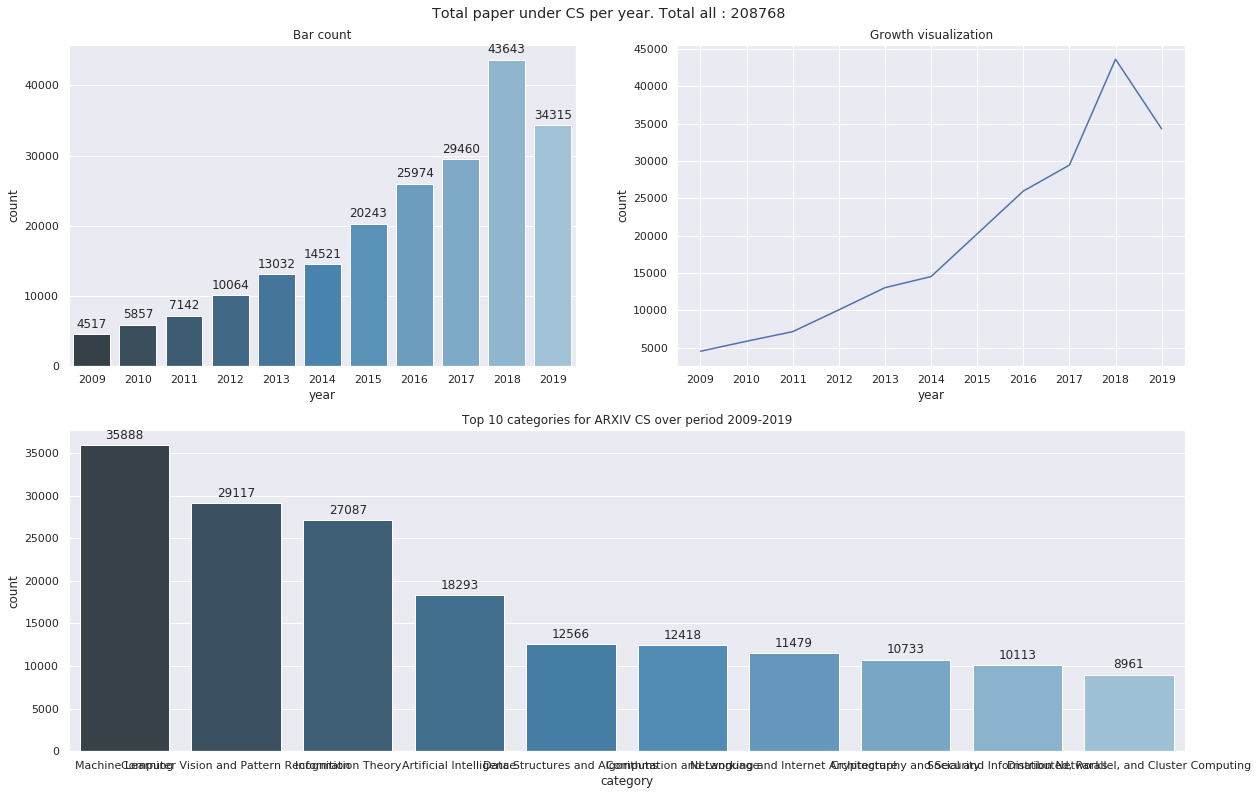

In [80]:
year_paper_count = dict()
categories_count = defaultdict(int)

for y in year:
    year_paper_count[y] = 0
    ABS_PATH = os.path.abspath(os.path.join(DIR_PATH, y))
    dir_list = os.listdir(ABS_PATH)
    for d in dir_list:
        data_obj = pd.read_csv(os.path.join(ABS_PATH, d))
        # Count per year
        year_paper_count[y] += len(data_obj) 
        
        # categories
        data_obj = data_obj['categories']
        for d in data_obj:
            for w in d.split(' '):
                if 'physics' not in w:
                    if 'cs.' in w:
                        categories_count[w] += 1

categories = sorted(categories_count.items(), key=lambda x:x[1], reverse=True)
categories = [(cs_arxiv_cat[x[0].lower()], x[1]) for x in categories]

df_year = pd.DataFrame({'year': year, 'count':[year_paper_count[y] for y in year]})
df_categories = pd.DataFrame({'category':[c[0] for c in categories[:10]],
                             'count':[c[1] for c in categories[:10]]})

plt.figure(figsize=(20,13))
plt.suptitle('Total paper under CS per year. Total all : {}'.format(len(data)), y=.92)

sub = plt.subplot(2, 2, 1)
sub.set_title('Bar count')
ax = sns.barplot(x="year", y="count", data=df_year, palette="Blues_d")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

sub = plt.subplot(2, 2, 2)  
sub.set_title('Growth visualization')
ax = sns.lineplot(x="year", y="count", data=df_year)

sub = plt.subplot(2,1,2)
sub.set_title('Top 10 categories for ARXIV CS over period 2009-2019')
ax = sns.barplot(x="category", y="count", data=df_categories, palette="Blues_d")
ax.set_xticklabels(rotation=60, labels=df_categories['category'])
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [87]:
x= sorted(categories_count.items(), key=lambda x: x[1], reverse=True)

In [89]:
[x_[0] for x_ in x[:10]]

['cs.lg',
 'cs.cv',
 'cs.it',
 'cs.ai',
 'cs.ds',
 'cs.cl',
 'cs.ni',
 'cs.cr',
 'cs.si',
 'cs.dc']

In [78]:
def label_mapping(label):
    return sorted(label.split(' '))

data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    for i in d:
        single_category.append(i)

c = Counter(single_category)


single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
                                  'count':[x[1] for x in c.most_common()]})

plt.figure(figsize=(15, 35))
plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
ax = sns.barplot(x="count", y="cat", data=single_category_df)
# ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

NameError: name 'Counter' is not defined

In [ ]:
def label_mapping(label):
    return sorted(label.split(' '))

# data['categories'] = data['categories'].apply(label_mapping)

single_category = []

for d in data['categories']:
    ai_crypto = []
    
    if 'cs.ai' in d:
        ai_crypto.append('cs.ai')
    if 'cs.cr' in d:
        ai_crypto.append('cs.cr')
    single_category.append((len(ai_crypto), ' '.join(ai_crypto)))




# single_category_df = pd.DataFrame({'cat':[x[0] for x in c.most_common()],
#                                   'count':[x[1] for x in c.most_common()]})

# plt.figure(figsize=(15, 35))
# plt.title('Single category count 2009-2019(06). [{}] unique label among total [{}] collected paper under cs'.format(len(single_category), len(data)))
# ax = sns.barplot(x="count", y="cat", data=single_category_df)
# # ax.set_yticklabels(rotation=90, labels=single_category_df['cat'])

## Create DataFrame with multi-classes

In [120]:
DATA_PATH = '/home/anneke/Documents/ann-mitchell-text-classification/dataset/arxiv_cs_09_19_data.parquet'

X_ = pd.read_parquet(DATA_PATH)

In [121]:
X_['categories']

0       math.st cs.lg math.pr stat.ap stat.th
1               math.oc cs.sy math.st stat.th
2               math.st cs.lg math.pr stat.th
3                               cs.it math.it
4                                 cs.sd cs.dm
                        ...                  
2581                        cs.lg cs.ai cs.cc
2582                              cs.lg cs.ma
2583                              cs.dm cs.dc
2584                cs.ds cs.it cs.lg math.it
2585                        cs.lg cs.ai cs.ni
Name: categories, Length: 208768, dtype: object

In [122]:
categories_list = ['cs.lg',
 'cs.cv',
 'cs.it',
 'cs.ai',
 'cs.ds',
 'cs.cl',
 'cs.ni',
 'cs.cr',
 'cs.si',
 'cs.dc']

In [131]:
multi_class=defaultdict(list)

In [132]:
multi_class['abstract'] = list(X_['abstract'])

In [133]:
for c in X_['categories']:
    for l in categories_list:
        if l in c.split(' '):
            multi_class[l].append(1)
        else:
            multi_class[l].append(0)

In [134]:
multi_class.keys()

dict_keys(['abstract', 'cs.lg', 'cs.cv', 'cs.it', 'cs.ai', 'cs.ds', 'cs.cl', 'cs.ni', 'cs.cr', 'cs.si', 'cs.dc'])

In [135]:
df_multi = pd.DataFrame(multi_class)

In [137]:
df_multi.tail()

,abstract,cs.lg,cs.cv,cs.it,cs.ai,cs.ds,cs.cl,cs.ni,cs.cr,cs.si,cs.dc
208763,reinforcement learning means finding the optim...,1,0,0,1,0,0,0,0,0,0
208764,cooperative games are those in which both agen...,1,0,0,0,0,0,0,0,0,0
208765,classical results on aperiodic tilings are rat...,0,0,0,0,0,0,0,0,0,1
208766,this work is motivated by the necessity to aut...,1,0,1,0,1,0,0,0,0,0
208767,reinforcement learning means learning a policy...,1,0,0,1,0,0,1,0,0,0


In [167]:
X_comb = df_multi[['abstract', 'cs.lg', 'cs.cv']].copy(deep=True)

In [168]:
drop_indices = X_comb[((X_comb['cs.lg'] == 0) & (X_comb['cs.cv'] == 0)) | ((X_comb['cs.lg'] == 1) & (X_comb['cs.cv'] == 1))].index

In [171]:
list(drop_indices)

[1,
 3,
 4,
 5,
 6,
 9,
 11,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 91,
 92,
 93,
 94,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 133,
 135,
 136,
 137,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 161,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 190,
 191,
 194,
 196,
 197,
 199,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 217,
 218

In [173]:
X_comb.drop(drop_indices)

,abstract,cs.lg,cs.cv
0,"in this article, we derive a new generalizatio...",1,0
2,"in this paper, we consider the nonasymptotic s...",1,0
7,"in this paper, we have established a unified f...",1,0
8,"in this paper, we have established a general f...",1,0
10,"in this paper, we have established a new frame...",1,0
16,statistical query (sq) learning model of kearn...,1,0
22,a scattering vector is a local descriptor incl...,0,1
34,this work reports the most relevant technical ...,1,0
35,we consider the problem of dynamic pricing wit...,1,0
39,in this paper we explore noise tolerant learni...,1,0


In [138]:
df_multi.to_parquet('./dataset/arxiv_top10_multi_label.parquet')

In [8]:
np.sum([s[0] for s in single_category])

29026

In [9]:
each_cat = np.array([s[0] for s in single_category])

In [10]:
np.sum(each_cat == 1), np.sum(each_cat == 2)

(28396, 315)

In [12]:
# need to plot between ai and crypto and both 
from collections import Counter

co = Counter(single_category)

In [24]:
group = co.most_common()
group

[((0, ''), 180057),
 ((1, 'cs.ai'), 17978),
 ((1, 'cs.cr'), 10418),
 ((2, 'cs.ai cs.cr'), 315)]

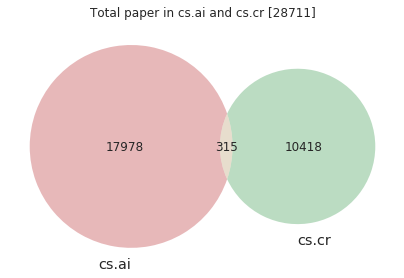

In [42]:
from matplotlib_venn import venn2

plt.figure(figsize=(7,7))
venn2(subsets = (group[1][1], group[2][1], group[3][1]), set_labels = ('cs.ai', 'cs.cr'))
plt.title('Total paper in cs.ai and cs.cr [{}]'.format(np.sum([i[1] for i in group[1:]])))
plt.show()


In [33]:
indices = np.where(np.array([s[0] for s in single_category]) == 1)[0]

In [34]:
indices.shape

(28396,)

In [39]:
# we got indices. 
# Now let's see what kind of words do they have.

X_ = data.iloc[indices]

In [40]:
# Let's put on parquet file for ease access

X_.head()

,id,title,categories,abstract,doi,created,updated,authors
23,1012.0065,counting in graph covers: a combinatorial char...,cs.it cond-mat.stat-mech cs.ai math.co math.it,we present a combinatorial characterization of...,10.1109/tit.2013.2264715,2010-11-30,2012-10-09,['vontobel']
34,1108.2283,a survey on independence-based markov networks...,cs.ai cs.lg,this work reports the most relevant technical ...,10.1007/s10462-012-9346-y,2011-08-10,2013-11-20,['schlüter']
36,1108.5935,the rabin cryptosystem revisited,math.nt cs.cr cs.it math.it,the rabin public-key cryptosystem is revisited...,NaN,2011-08-30,2013-11-03,"['elia', 'piva', 'schipani']"
69,1205.4778,backscatter from the data plane --- threats to...,cs.ni cs.cr,information-centric networking proposals attra...,10.1016/j.comnet.2013.07.009,2012-05-21,2012-09-02,"['wählisch', 'schmidt', 'vahlenkamp']"
86,1208.2076,upper bounds on the number of codewords of som...,cs.it cs.cr math.it,separating codes have their applications in co...,NaN,2012-08-09,2013-11-21,"['kim', 'sin', 'song']"


In [45]:
# Need to change column id to byte
X_['id'] = X_['id'].astype(str)
X_.to_parquet('./dataset/arxiv_ai_crypto_data.parquet')

/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
data['id'] = data['id'].astype(str)

In [57]:
data.to_parquet('./dataset/arxiv_cs_09_19_data.parquet')

# Test AI VS Crypto

## Let's exclude papers with both.

### Data split on (1./3) 

In [62]:
X_ = pd.read_parquet('./dataset/arxiv_ai_crypto_data.parquet')

In [63]:
X_.head()

,id,title,categories,abstract,doi,created,updated,authors
23,1012.0065,counting in graph covers: a combinatorial char...,cs.it cond-mat.stat-mech cs.ai math.co math.it,we present a combinatorial characterization of...,10.1109/tit.2013.2264715,2010-11-30,2012-10-09,['vontobel']
34,1108.2283,a survey on independence-based markov networks...,cs.ai cs.lg,this work reports the most relevant technical ...,10.1007/s10462-012-9346-y,2011-08-10,2013-11-20,['schlüter']
36,1108.5935,the rabin cryptosystem revisited,math.nt cs.cr cs.it math.it,the rabin public-key cryptosystem is revisited...,None,2011-08-30,2013-11-03,"['elia', 'piva', 'schipani']"
69,1205.4778,backscatter from the data plane --- threats to...,cs.ni cs.cr,information-centric networking proposals attra...,10.1016/j.comnet.2013.07.009,2012-05-21,2012-09-02,"['wählisch', 'schmidt', 'vahlenkamp']"
86,1208.2076,upper bounds on the number of codewords of som...,cs.it cs.cr math.it,separating codes have their applications in co...,None,2012-08-09,2013-11-21,"['kim', 'sin', 'song']"


In [50]:
def apply_categories(data, labels=['cs.ai', 'cs.cr']):
    '''
        Need to make sure that there is no overlap between these categories first!
    '''
    
    for l in labels:
        if l in data.split(' '):
            return l

X_['categories'] = X_['categories'].apply(apply_categories)

In [64]:
# Split data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_['abstract'], X_['categories'], test_size=(1./3), random_state=42)

In [65]:
X_train = list(X_train)
X_test = list(X_test)

In [66]:
len(X_train), len(X_test)

(18930, 9466)

In [71]:
from nltk.tokenize import word_tokenize

X_train = [word_tokenize(text) for text in X_train]
X_test = [word_tokenize(text) for text in X_test]

In [72]:
X_train[0]

['secret',
 'sharing',
 'in',
 'user',
 'hierarchy',
 'represents',
 'a',
 'challenging',
 'area',
 'for',
 'research',
 '.',
 'although',
 'a',
 'lot',
 'of',
 'work',
 'has',
 'already',
 'been',
 'done',
 'in',
 'this',
 'direc-',
 'tion',
 ',',
 'this',
 'paper',
 'presents',
 'a',
 'novel',
 'approach',
 'to',
 'share',
 'a',
 'secret',
 'among',
 'a',
 'hierarchy',
 'of',
 'users',
 'while',
 'overcoming',
 'the',
 'limitations',
 'of',
 'the',
 'already',
 'exist-',
 'ing',
 'mechanisms',
 '.',
 'our',
 'work',
 'is',
 'based',
 'on',
 'traditional',
 '(',
 'k',
 '+1',
 ';',
 'n',
 ')',
 '-threshold',
 'secret',
 'sharing',
 ',',
 'which',
 'is',
 'secure',
 'as',
 'long',
 'as',
 'an',
 'adversary',
 'can',
 'compromise',
 'not',
 'more',
 'than',
 'k',
 'secret',
 'shares',
 '.',
 'but',
 'in',
 'real',
 'life',
 'it',
 'is',
 'often',
 'feasible',
 'for',
 'an',
 'adversary',
 'to',
 'obtain',
 'more',
 'than',
 'k',
 'shares',
 'over',
 'a',
 'long',
 'period',
 'of',
 'time

In [73]:
max([len(x) for x in X_train]), np.median([len(x) for x in X_train])

(631, 167.0)

In [74]:
max([len(x) for x in X_test]), np.median([len(x) for x in X_test])

(535, 169.0)

In [54]:
len(X_train), len(X_test), len(y_train), len(y_test)

(18930, 9466, 18930, 9466)

In [55]:
type(y_test)

pandas.core.series.Series

In [40]:
y_test.iloc[[1,2,3]]

276    0
978    0
840    0
Name: categories, dtype: int64

In [43]:
y_test.iloc[[1,2,3]].get_values()

/home/anneke/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


array([0, 0, 0])

In [56]:
to_binary = {'cs.ai':1, 'cs.cr':0}
y_train = y_train.apply(lambda x: to_binary[x])

In [57]:
y_test = y_test.apply(lambda x: to_binary[x])

In [27]:
y_test.iloc[[1,2]]

276    0
978    0
Name: categories, dtype: int64

In [28]:
y_test.head()

1897    0
276     0
978     0
840     0
1287    1
Name: categories, dtype: int64

## Test logistic regression

In [58]:
from utils import utils

X_train, X_test, cv = utils.vectorize_keywords_docs(X_train, X_test, return_cv=True)

In [60]:
X_train['docs']

<18930x2565 sparse matrix of type '<class 'numpy.int64'>'
	with 1559257 stored elements in Compressed Sparse Row format>

In [61]:
X_train['docs'][0]

<1x2565 sparse matrix of type '<class 'numpy.int64'>'
	with 81 stored elements in Compressed Sparse Row format>

In [28]:
len(cv.vocabulary_)

2565

In [29]:
import sklearn

clf = sklearn.linear_model.LogisticRegression()
clf.fit(X_train['docs'], y_train)

weight = clf.coef_[0]
words = cv.get_feature_names()

crypto_indices = np.argsort(weight)
ai_indices = crypto_indices[::-1]

/home/anneke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
# %%pycodestyle

threshold = 300
k_ai = []
k_crypto = []
w_ai = []
w_crypto = []

print('-'*10,
      '{} KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY'.format(threshold))
print('\t{:<20}\t\t{:<20}'.format('cs.ai', 'cs.cr'))

for i, (ai, crypto) in enumerate(zip(ai_indices[:threshold], 
                                     crypto_indices[:threshold])):
#     print('{:03d}\t{:<20}\t{:.3f}\t{:<20}\t{:.3f}'.format(i+1,
#                                                           words[ai],
#                                                           weight[ai],
#                                                           words[crypto],
#                                                           weight[crypto]))
    k_ai.append(words[ai])
    k_crypto.append(words[crypto])
    w_ai.append(weight[ai])
    w_crypto.append(weight[crypto])

scisport_df = pd.DataFrame({'sci/tech_k':  k_ai,
                            'sci/tech_w': w_ai,
                            'sports_k': k_crypto,
                            'sports_w': w_crypto})

---------- 300 KEYWORD ASSOCIATED WITH [cs.ai and cs.cr] CATEGORY
	cs.ai               		cs.cr               


In [31]:
# scisport_df

In [34]:
clf.score(X_train['docs'], y_train), clf.score(X_test['docs'], y_test)

(0.9952984680401479, 0.9538347770969786)

## Processing all keywords for Arxiv (AI vs Crypto)

In [73]:
import json

KEYWORD_DIR = "/home/anneke/Documents/ann-mitchell-text-classification/data/arxiv-aicrypto-keywords"

filelist = os.listdir(KEYWORD_DIR)

arxiv_keyword = {}
arxiv_keyword['100'] = {}
arxiv_keyword['200'] = {}
arxiv_keyword['300'] = {}

keys = {}

for file in filelist:
    with open(os.path.join(KEYWORD_DIR, file), 'r') as text:
        file_token = file[:-4].split('-')

        f = text.readlines()
        keylist = []
        for l in f:
            keylist.append(l.strip())

        arxiv_keyword[file_token[-1]][file_token[-2]] = keylist
        
for i in range(100, 301, 100):
    arxiv_keyword[str(i)]['summary'] = {}
    arxiv_keyword[str(i)]['summary']['total_ai'] = len(arxiv_keyword[str(i)]['ai'])
    arxiv_keyword[str(i)]['summary']['total_crypto'] = len(arxiv_keyword[str(i)]['crypto'])
    arxiv_keyword[str(i)]['summary']['total'] = arxiv_keyword[str(i)]['summary']['total_ai'] + arxiv_keyword[str(i)]['summary']['total_crypto']
    
for i in range(100, 301, 100):
    print(arxiv_keyword[str(i)]['summary'])
    
# save to JSON file
with open(os.path.join(KEYWORD_DIR, 'arxiv_keywords.json'), 'w') as json_file:
    json.dump(arxiv_keyword, json_file, indent=4)

{'total_ai': 31, 'total_crypto': 40, 'total': 71}
{'total_ai': 59, 'total_crypto': 67, 'total': 126}
{'total_ai': 85, 'total_crypto': 82, 'total': 167}


In [76]:
arxiv_dict = {}
arxiv_dict['length'] = []
arxiv_dict['ai'] = []
arxiv_dict['crypto'] = []
arxiv_dict['total'] = []


for i in range(100, 301, 100):
    arxiv_dict['length'].append(i)
    arxiv_dict['ai'].append(arxiv_keyword[str(i)]['summary']['total_ai'])
    arxiv_dict['crypto'].append(arxiv_keyword[str(i)]['summary']['total_crypto'])
    arxiv_dict['total'].append(arxiv_keyword[str(i)]['summary']['total'])

In [77]:
arxiv_df = pd.DataFrame(arxiv_dict)
arxiv_df

,length,ai,crypto,total
0,100,31,40,71
1,200,59,67,126
2,300,85,82,167


## Full view on keywords

In [97]:
keyword = {}

for i in range(100, 301, 100):
    keyword[str(i)] = sorted(arxiv_keyword[str(i)]['ai'] + arxiv_keyword[str(i)]['crypto'])
    
max_len = len(keyword['300'])
keyword['100'] = keyword['100'] + ([np.nan] * (max_len-len(keyword['100'])))
keyword['200'] = keyword['200'] + ([np.nan] * (max_len-len(keyword['200'])))
df = pd.DataFrame(keyword)

In [6]:
import glob

In [10]:
sorted(glob.glob('/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/*.h5'))

['/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/001-0.599-0.730.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/002-0.570-0.729.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/003-0.558-0.735.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/004-0.553-0.736.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/005-0.549-0.735.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/006-0.548-0.736.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/007-0.546-0.737.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/008-0.492-0.767.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/009-0.458-0.776.h5',
 '/home/anneke/Documents/models/weights/int-imdb-1-100-1000-8-19-08-27_20:34:02/010-0.441-0

# Processing keyword

In [177]:
import json

PATH = '/home/anneke/Documents/models/weights/lr-arxiv-19-09-04_11:22:11'
p = os.listdir(PATH)

keyword = json.load(open(os.path.join(PATH, p[0]), 'r'))

In [182]:
keyword['results']["('cs.ai', 'cs.ds')"].keys()

dict_keys(['categories', 'train_test_len', 'train_acc', 'test_acc', 'cs.ai-150-words', 'cs.ds-150-words'])

In [184]:
for k in keyword['results']["('cs.ai', 'cs.ds')"]['cs.ds-150-words']:
    print(k)

ai
ontology
fuzzy
causal
neural
asp
ensemble
belief
argumentation
cognitive
intelligence
expert
plans
bayesian
reasoning
learns
particle
robot
reinforcement
deep
reasons
perception
learning
conjunction
inference
category
express
assignments
logic
semantic
intelligent
convolutional
sentences
observation
theories
help
semantics
ontologies
evidence
independence
agent
human
actions
probabilities
calculus
net
architecture
planning
gamma
life
predicting
recommendations
discussion
evolutionary
informative
satisfaction
robustness
deployment
decentralized
cell
quantify
computers
domain
variables
explanations
diagnosis
train
create
reward
challenges
lstm
training
voting
proposal
controlled
rule
structured
optimally
iteratively
humans
logical
integrates
encoder
vehicle
ways
computes
acyclic
bayes
50
investigated
course
probabilistic
focusing
assessment
propositional
potential
relations
around
predictive
law
hybrid
health
updating
spanning
gaussian
investigation
incremental
actor
consistency
decla

In [ ]:
import json
import glob

KEYWORD_DIR = "/home/anneke/Documents/ann-mitchell-text-classification/data/agnews-sci_sport-keywords"

filelist = glob.glob1(KEYWORD_DIR, "*.txt")

arxiv_keyword = {}
arxiv_keyword['100'] = {}
arxiv_keyword['200'] = {}
arxiv_keyword['300'] = {}

keys = {}

for file in filelist:
    with open(os.path.join(KEYWORD_DIR, file), 'r') as text:
        file_token = file[:-4].split('-')

        f = text.readlines()
        keylist = []
        for l in f:
            keylist.append(l.strip())

        arxiv_keyword[file_token[-1]][file_token[-2]] = keylist
        
for i in range(100, 301, 100):
    arxiv_keyword[str(i)]['summary'] = {}
    arxiv_keyword[str(i)]['summary']['total_scitech'] = len(arxiv_keyword[str(i)]['scitech'])
    arxiv_keyword[str(i)]['summary']['total_world'] = len(arxiv_keyword[str(i)]['world'])
    arxiv_keyword[str(i)]['summary']['total'] = arxiv_keyword[str(i)]['summary']['total_scitech'] + arxiv_keyword[str(i)]['summary']['total_world']
    
for i in range(100, 301, 100):
    print(arxiv_keyword[str(i)]['summary'])
    
# save to JSON file
with open(os.path.join(KEYWORD_DIR, 'agnews_scitechworld_keywords.json'), 'w') as json_file:
    json.dump(arxiv_keyword, json_file, indent=4)